### DSPT6 - Adding Data Science to a Web Application

The purpose of this notebook is to demonstrate:
- Simple online analysis of data from a user of the Twitoff app or an API
- Train a more complicated offline model, and serialize the results for online use

In [58]:
import sqlite3
import pickle
import pandas as pd

In [59]:
# Connect to sqlite database
conn = sqlite3.connect('/Users/codyreece/Desktop/Repos/TwitOff/twitoff/twitoff.db')

In [60]:
def get_data(query, conn):
    '''Function to get data from SQLite DB'''
    
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()

    # Get columns from cursor object
    columns = list(map(lambda x: x[0], cursor.description))

    # Assign to DataFrame
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [61]:
import pickle

sql = '''
SELECT 
	tweet.id,
	tweet.tweet, 
	tweet.embedding,
	user.username
FROM tweet
JOIN user on tweet.user_id = user.id;
'''

df = get_data(sql, conn)
df['embedding_decoded'] = df.embedding.apply(lambda x: pickle.loads(x))
print(df.shape)
df.sample(10)

(1603, 5)


,id,tweet,embedding,username,embedding_decoded
1424,1312834144423079939,Video: UFC vet Magomed Bibulatov gets insane s...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,MMAjunkie,"[-0.2557167, 0.0730778, 0.05723227, 0.10477226..."
218,1206596578326134786,Рад был видеть вас Ребята.\nПусть Всевышний об...,"b""\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...",TeamKhabib,"[0.0016001334, 0.027668, -0.016770666, -0.0791..."
1587,1313531124677783552,Dana White says @JonnyBones vs. @Stylebender i...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,MMAjunkie,"[-0.14046909, 0.19188124, -0.07887493, 0.02041..."
660,1301631354380066816,Here are the betting odds for @Alistairovereem...,b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,danawhite,"[-0.09740028, 0.14341523, -0.053290207, 0.0288..."
1393,1312640841274593281,.@HollyHolm speaks on rematches with @Amanda_L...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,MMAjunkie,"[-0.071318075, 0.14340906, -0.10502444, 0.1067..."
261,1219093283265138688,"Hey, India. We’re rolling out our new fleet of...",b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,JeffBezos,"[0.031138683, 0.23864304, 0.007979002, -0.2018..."
567,1296936682781126658,Wonderful news.\n\nhttps://t.co/poCNjmo519,b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,HillaryClinton,"[-0.0553178, 0.29042402, -0.06813921, -0.07942..."
844,1307365838723350536,If you feel Neuralink might have incorrectly o...,b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,elonmusk,"[-0.06684641, 0.21207142, -0.22871257, 0.10376..."
174,1190274676330766339,We have cut the number of child deaths in half...,b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,BillGates,"[-0.068300985, 0.19222279, -0.05779521, -0.063..."
107,990692677963284480,The lucky boots worked again. Huge kudos and t...,b'\x80\x05\x95$\x05\x00\x00\x00\x00\x00\x00\x8...,JeffBezos,"[-0.06912158, 0.04359758, -0.081092216, -0.063..."


In [62]:
pickle.loads(df.embedding.iloc[0])

array([-1.33186996e-01,  4.54675466e-01, -9.89831984e-03,  3.55510265e-02,
       -7.85662681e-02,  6.05726503e-02,  2.39009902e-01, -1.38357878e-01,
        2.84181293e-02,  1.54783595e+00, -2.16326952e-01, -6.46442696e-02,
        4.45205905e-02, -1.52527913e-01, -1.10074570e-02,  9.56289470e-02,
       -2.10982308e-01,  9.99905944e-01, -1.08341902e-01, -7.25290924e-02,
       -6.57819957e-02, -2.89864521e-02,  6.24181889e-02,  2.83142701e-02,
        1.91343397e-01,  2.47475684e-01, -1.45901963e-01, -3.83023210e-02,
        2.99033076e-01,  4.49838452e-02, -1.34491503e-01, -8.37336853e-02,
        1.19221896e-01,  2.51034707e-01, -1.76497281e-01, -3.93485390e-02,
       -1.06419854e-01,  1.84937567e-01, -2.36513242e-02,  1.60442173e-01,
       -1.19352363e-01,  2.87031885e-02, -1.48760974e-01,  1.74342692e-01,
        7.94820413e-02,  1.97799355e-01, -1.83057152e-02, -3.90699059e-02,
       -1.11721948e-01, -3.30960415e-02,  1.66408181e-01,  1.19132109e-01,
       -1.15092903e-01,  

In [63]:
df.username.value_counts()

TeamKhabib         194
danawhite          192
JeffBezos          185
JoeBiden           182
MMAjunkie          178
JonnyBones         163
BillGates          146
BernieSanders      141
HillaryClinton     132
TheNotoriousMMA     69
elonmusk            20
realDonaldTrump      1
Name: username, dtype: int64

In [64]:
import numpy as np

user1_embeddings = df.embedding_decoded[df.username == 'danawhite']
user2_embeddings = df.embedding_decoded[df.username == 'JeffBezos']
embeddings = pd.concat([user1_embeddings, user2_embeddings])

embeddings_df = pd.DataFrame(embeddings.to_list(),
                             columns=[f'dom{i}' for i in range(300)])
labels = np.concatenate([np.ones(len(user1_embeddings)),
                         np.zeros(len(user2_embeddings))])
print(embeddings_df.shape, labels.shape)

(377, 300) (377,)


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embeddings_df, labels, test_size=0.25, random_state=42
)
print(X_train.shape, X_test.shape)

(282, 300) (95, 300)


In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
%timeit log_reg.fit(X_train, y_train)

14 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        41
         1.0       0.91      0.96      0.94        54

    accuracy                           0.93        95
   macro avg       0.93      0.92      0.92        95
weighted avg       0.93      0.93      0.93        95



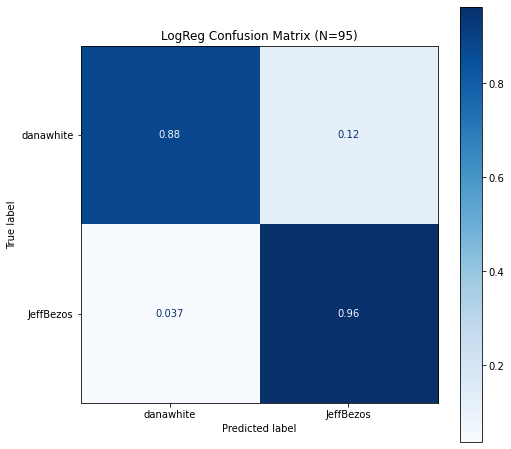

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(log_reg, X_test, y_test, 
                      normalize='true', cmap='Blues', 
                      display_labels=['danawhite', 'JeffBezos'], ax=ax)
plt.title(f'LogReg Confusion Matrix (N={X_test.shape[0]})');

In [114]:
import spacy

# Load SpaCy pre-trained model
nlp = spacy.load('en_core_web_md', disable=['tagger', 'parser'])

def vectorize_tweet(nlp, tweet_text):
    '''This function returns the SpaCy embeddings for an input text'''
    return list(nlp(tweet_text).vector)

In [115]:
new_embedding = vectorize_tweet(nlp, "When i was a young boy, my father took me into the city, to see a marching band. He said son when you grow up you will be the savior of the broken and the damned.")
new_embedding[0:5]

[0.05831483, 0.17458451, -0.22347608, -0.053993672, 0.14101635]

In [116]:
log_reg.predict([new_embedding])

array([0.])

In [132]:
# pickle.dump(log_reg, open("../models/log_reg.pkl", "wb"))

In [133]:
# unpickled_lr = pickle.load(open("../models/log_reg.pkl", "rb"))
# unpickled_lr.predict([new_embedding])